In [1]:
from __future__ import absolute_import, division, print_function # Python2 compatibility
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

from The_Payne import utils
from The_Payne import training

import torch
from The_Payne import spectral_model
from The_Payne import fitting
import os
import scipy

from astropy.table import Table,unique

In [2]:
wavelength = utils.load_wavelength_array(survey='galah')
NN_coeffs = utils.read_in_neural_network()
w_array_0, w_array_1, w_array_2, b_array_0, b_array_1, b_array_2, x_min, x_max = NN_coeffs

In [3]:
#mask = utils.galah_mask(wavelength, sme_like=False, cores_out=True)
#mask = utils.galah_mask(wavelength, sme_like=True, cores_out=True)

#mask =np.ones(len(wavelength),dtype=bool)

#mask = utils.load_galah_mask()
#mask[np.abs(wavelength-4861.3230)<2.5]=False # do not use core of H_beta
#mask[np.abs(wavelength-6562.7970)<2.5]=False # do not use core of H_alpha

mask = np.zeros(wavelength.size, dtype=bool) # no masking

In [4]:
galah_4stars = np.load("galah_4stars.npz")

In [5]:
sobject_id = galah_4stars['sobject_id']

flux = galah_4stars['flux']
flux_error = galah_4stars['flux_error']

TEFF = galah_4stars['labels'][0,:]
LOGG = galah_4stars['labels'][1,:]
FEH = galah_4stars['labels'][2,:]
ALPHA = galah_4stars['labels'][3,:]

In [6]:
para = []
fit_spec = []
spec = flux
spec_err = flux_error

In [7]:
for spec,spec_err in zip(spec,spec_err):

    popt, pcov, best_fit_spec = fitting.fit_normalized_spectrum_single_star_model(norm_spec = spec, 
        spec_err = spec_err, NN_coeffs = NN_coeffs, wavelength=wavelength, mask=mask, p0 = None)
    print(popt)
    para.append(popt)
    fit_spec.append(best_fit_spec)

[ 5.63947708e+03  3.88121435e+00 -2.14753631e-01 -2.43214231e-02
  1.47990266e+01]
[ 4.54900998e+03  6.25881323e-01 -5.70123379e-01  1.92222888e-01
  1.48669572e+01]
[ 6.44925868e+03  3.26483068e+00 -1.82923095e-01  3.99493194e-02
  1.77751951e+01]
[ 5.88349463e+03  3.54002673e+00 -2.01117782e-01 -3.47528452e-02
  1.40883950e+01]


(5.5, 0)

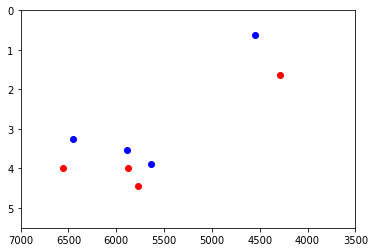

In [8]:
plt.scatter(TEFF,LOGG,color='r')
plt.scatter(np.array(para)[:,0],np.array(para)[:,1],color='b')
plt.xlim(7000,3500)
plt.ylim(5.5,0)

In [9]:
##为了获取标准差
training_labels, training_spectra, validation_labels, validation_spectra = utils.load_training_data(survey='galah',size = 9000)

MemoryError: Unable to allocate 5.25 GiB for an array with shape (704529216,) and data type float64

In [10]:
line_strength = np.std(training_spectra, axis=0)

NameError: name 'training_spectra' is not defined

In [ ]:
line_strength

In [ ]:
#####################上面是为了获取标准差

########Sun

NameError: name 'line_strength' is not defined

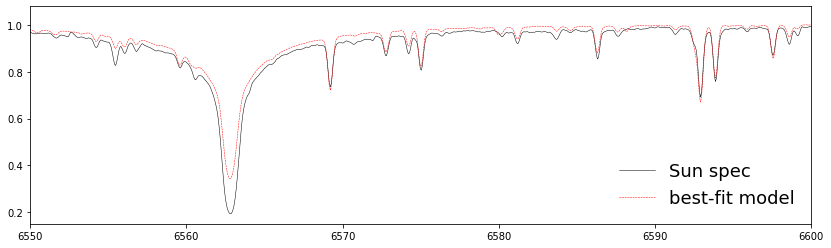

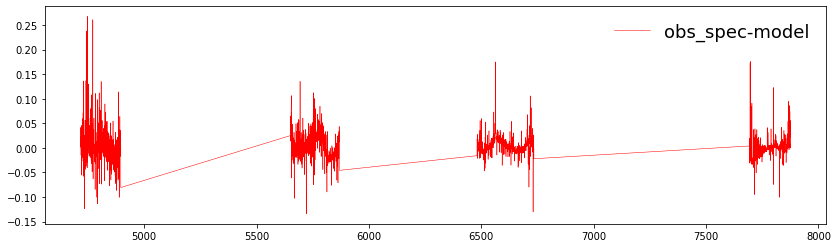

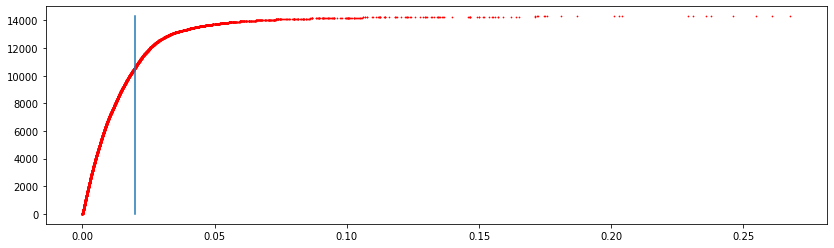

<Figure size 1008x288 with 0 Axes>

In [10]:
plt.figure(figsize=(14, 4))
plt.plot(wavelength, flux[0,:], 'k', lw=0.5, label = 'Sun spec')
plt.plot(wavelength, fit_spec[0], 'r--', lw=0.5, label = 'best-fit model')
plt.xlim(6550, 6600)
plt.legend(loc = 'best', frameon = False, fontsize = 18)
###################################################################################
plt.figure(figsize=(14, 4))
plt.plot(wavelength, fit_spec[0]-flux[0,:], 'r', lw=0.5, label = 'obs_spec-model')
#plt.xlim(6500, 6700)
plt.legend(loc = 'best', frameon = False, fontsize = 18)
###################################################################################
plt.figure(figsize=(14, 4))
plt.scatter(np.sort(abs(fit_spec[0]-flux[0,:])),np.arange(1,(abs(fit_spec[0]-flux[0,:]).shape[0])+1,1),s=0.5,c='r')
plt.plot([0.02,0.02],[0,abs(fit_spec[0]-flux[0,:]).shape[0]])
##################################################################################
plt.figure(figsize=(14, 4))
plt.scatter(abs(fit_spec[0]-flux[0,:]),line_strength,s=1)

In [ ]:
mask_in_sun = (np.array(np.where((fit_spec[0]-flux[0,:]) > 0.02))).ravel()

In [ ]:
mask_in_sun

####Arcturus

In [ ]:
plt.figure(figsize=(14, 4))
plt.plot(wavelength, flux[1,:], 'k', lw=0.5, label = 'Arcturus spec')
plt.plot(wavelength, fit_spec[1], 'r--', lw=0.5, label = 'best-fit model')
plt.xlim(6500, 6700)
plt.legend(loc = 'best', frameon = False, fontsize = 18)
###################################################################################
plt.figure(figsize=(14, 4))
plt.plot(wavelength, fit_spec[1]-flux[1,:], 'r', lw=0.5, label = 'obs_spec-model')
#plt.xlim(6500, 6700)
plt.legend(loc = 'best', frameon = False, fontsize = 18)
##################################################################################

plt.figure(figsize=(14, 4))
plt.scatter(np.sort(abs(fit_spec[1]-flux[1,:])),np.arange(1,(abs(fit_spec[1]-flux[1,:]).shape[0])+1,1),s=0.5,c='r')
#################################################################################
plt.figure(figsize=(14, 4))
plt.scatter(abs(fit_spec[1]-flux[1,:]),line_strength,s=1)

In [ ]:
mask_in_arc = (np.array(np.where((fit_spec[1]-flux[1,:]) > 0.02))).ravel()

In [ ]:
mask_in_arc

####Procyon

In [ ]:
plt.figure(figsize=(14, 4))
plt.plot(wavelength, flux[2,:], 'k', lw=0.5, label = 'Procyon spec')
plt.plot(wavelength, fit_spec[2], 'r--', lw=0.5, label = 'best-fit model')
plt.xlim(6500, 6700)
plt.legend(loc = 'best', frameon = False, fontsize = 18)
###################################################################################
plt.figure(figsize=(14, 4))
plt.plot(wavelength, fit_spec[2]-flux[2,:], 'r', lw=0.5, label = 'obs_spec-model')
#plt.xlim(6500, 6700)
plt.legend(loc = 'best', frameon = False, fontsize = 18)
#################################################################################
plt.figure(figsize=(14, 4))
plt.scatter(np.sort(abs(fit_spec[2]-flux[2,:])),np.arange(1,(abs(fit_spec[2]-flux[2,:]).shape[0])+1,1),s=0.5,c='r')
plt.plot([0.02,0.02],[0,abs(fit_spec[2]-flux[2,:]).shape[0]])
################################################################################
plt.figure(figsize=(14, 4))
plt.scatter(abs(fit_spec[2]-flux[2,:]),line_strength,s=1)

In [ ]:
mask_in_pro = (np.array(np.where((fit_spec[2]-flux[2,:]) > 0.02))).ravel()

In [ ]:
mask_in_pro

####betHyi

In [ ]:
plt.figure(figsize=(14, 4))
plt.plot(wavelength, flux[3,:], 'k', lw=0.5, label = 'betHyi spec')
plt.plot(wavelength, fit_spec[3], 'r--', lw=0.5, label = 'best-fit model')
#plt.xlim(6500, 6700)
plt.legend(loc = 'best', frameon = False, fontsize = 18)
###################################################################################
plt.figure(figsize=(14, 4))
plt.plot(wavelength, fit_spec[3]-flux[3,:], 'r', lw=0.5, label = 'obs_spec-model')
#plt.xlim(6500, 6700)
plt.legend(loc = 'best', frameon = False, fontsize = 18)
#################################################################################
plt.figure(figsize=(14, 4))
plt.scatter(np.sort(abs(fit_spec[3]-flux[3,:])),np.arange(1,(abs(fit_spec[3]-flux[3,:]).shape[0])+1,1),s=0.5,c='r')
################################################################################
plt.figure(figsize=(14, 4))
plt.scatter(abs(fit_spec[3]-flux[3,:]),line_strength,s=1)


In [ ]:
mask_in_bet = (np.array(np.where((fit_spec[3]-flux[3,:]) > 0.02))).ravel()

#将所有mask集合起来

In [ ]:
allmask =np.unique(np.hstack((mask_in_sun,mask_in_arc,mask_in_pro,mask_in_bet)))

In [ ]:
np.savez('mask.npz',mask=allmask)  

In [ ]:
#sun 0.04 Arc 0.07

In [ ]:
############logg sensitive range

In [11]:
real_labels_1 = [5772, 3.0, 0.0,0.0,6.51551]  
real_labels_2 = [5772, 3.5, 0.0,0.0,6.51551]  
real_labels_3 = [5772, 4.0, 0.0,0.0,6.51551]  
real_labels_4 = [5772, 4.438, 0.0,0.0,6.51551] 

In [12]:
scaled_labels_1 = (real_labels_1[:]-x_min)/(x_max-x_min) - 0.5
scaled_labels_2 = (real_labels_2[:]-x_min)/(x_max-x_min) - 0.5
scaled_labels_3 = (real_labels_3[:]-x_min)/(x_max-x_min) - 0.5
scaled_labels_4 = (real_labels_4[:]-x_min)/(x_max-x_min) - 0.5

In [13]:
real_spec_1 = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels_1, NN_coeffs = NN_coeffs)
real_spec_2 = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels_2, NN_coeffs = NN_coeffs)
real_spec_3 = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels_3, NN_coeffs = NN_coeffs)
real_spec_4 = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels_4, NN_coeffs = NN_coeffs)

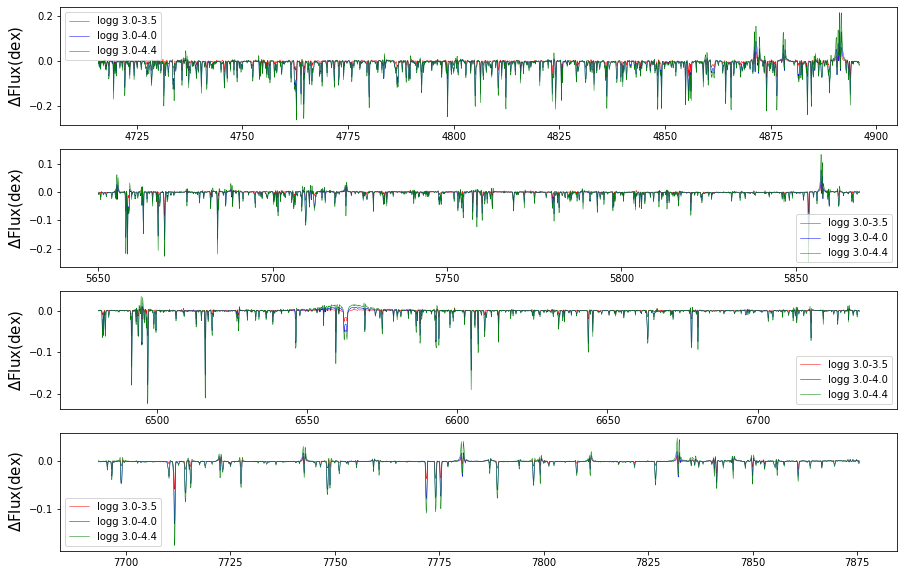

In [14]:
ccd = dict()
for each_ccd in range(4):
    ccd[each_ccd] = (wavelength > 1000*(4+each_ccd)) & (wavelength < 1000*(5+each_ccd))

f, gs = plt.subplots(4,1,figsize=(15,10))
for it in range(4):
    ax=gs[it]
    ax.plot(wavelength[ccd[it]], real_spec_1[ccd[it]]-real_spec_2[ccd[it]], 'r', lw=0.5)
    ax.plot(wavelength[ccd[it]], real_spec_1[ccd[it]]-real_spec_3[ccd[it]], 'b', lw=0.5)
    ax.plot(wavelength[ccd[it]], real_spec_1[ccd[it]]-real_spec_4[ccd[it]], 'g', lw=0.5)
    ax.legend(labels=['logg 3.0-3.5','logg 3.0-4.0','logg 3.0-4.4'],loc='best')
    ax.set_ylabel('$\Delta$Flux(dex)',fontsize=15)
fig = plt.gcf()
fig.savefig('logg_min3.png', format='png')

In [ ]:
ccd = dict()
for each_ccd in range(4):
    ccd[each_ccd] = (wavelength > 1000*(4+each_ccd)) & (wavelength < 1000*(5+each_ccd))

f, gs = plt.subplots(4,1,figsize=(15,10))
for it in range(4):
    ax=gs[it]
    ax.plot(wavelength[ccd[it]], real_spec_3[ccd[it]]-real_spec_4[ccd[it]], 'r', lw=0.5)
    ax.legend(labels=['logg4.0-logg4.4'],loc='best')
    ax.set_ylabel('$\Delta$Flux',fontsize=15)
fig = plt.gcf()
fig.savefig('logg_min.eps', format='eps')

In [ ]:
########################上面是logg sensitive range

In [ ]:
#####################下面是broad sensitive range

In [ ]:
real_labels_1 = [5770, 4.4, 0.0,0.0,9.0]  
real_labels_2 = [5770, 4.4, 0.0,0.0,12.0]  
real_labels_3 = [5770, 4.4, 0.0,0.0,15.0]  
real_labels_4 = [5770, 4.4, 0.0,0.0,20.0] 

In [ ]:
scaled_labels_1 = (real_labels_1[:]-x_min)/(x_max-x_min) - 0.5
scaled_labels_2 = (real_labels_2[:]-x_min)/(x_max-x_min) - 0.5
scaled_labels_3 = (real_labels_3[:]-x_min)/(x_max-x_min) - 0.5
scaled_labels_4 = (real_labels_4[:]-x_min)/(x_max-x_min) - 0.5

In [ ]:
real_spec_1 = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels_1, NN_coeffs = NN_coeffs)
real_spec_2 = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels_2, NN_coeffs = NN_coeffs)
real_spec_3 = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels_3, NN_coeffs = NN_coeffs)
real_spec_4 = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels_4, NN_coeffs = NN_coeffs)

In [ ]:
ccd = dict()
for each_ccd in range(4):
    ccd[each_ccd] = (wavelength > 1000*(4+each_ccd)) & (wavelength < 1000*(5+each_ccd))

f, gs = plt.subplots(4,1,figsize=(15,10))
for it in range(4):
    ax=gs[it]
    ax.plot(wavelength[ccd[it]], real_spec_1[ccd[it]]-real_spec_2[ccd[it]], 'r', lw=0.5)
    ax.plot(wavelength[ccd[it]], real_spec_1[ccd[it]]-real_spec_3[ccd[it]], 'b', lw=0.5)
    ax.plot(wavelength[ccd[it]], real_spec_1[ccd[it]]-real_spec_4[ccd[it]], 'g', lw=0.5)
    ax.legend(labels=['broad 9-12','logg 12-15','logg 15-20'],loc='best')
    ax.set_ylabel('$\Delta$broad',fontsize=15)
fig = plt.gcf()
fig.savefig('broad_min3.png', format='png')

In [ ]:
ccd = dict()
for each_ccd in range(4):
    ccd[each_ccd] = (wavelength > 1000*(4+each_ccd)) & (wavelength < 1000*(5+each_ccd))

f, gs = plt.subplots(4,1,figsize=(15,10))
for it in range(4):
    ax=gs[it]
    ax.plot(wavelength[ccd[it]], real_spec_3[ccd[it]]-real_spec_4[ccd[it]], 'r', lw=0.5)
    ax.legend(labels=['broad 15-broad20'],loc='best')
    ax.set_ylabel('$\Delta$Flux',fontsize=15)
fig = plt.gcf()
fig.savefig('broad_min.eps', format='eps')

In [ ]:
#针对太阳，我们可以获取四条不同来源的光谱

In [15]:
synthetic_SunArc = np.load("GALAH_NordlanderSunArc_GUESSnorm.npz")

In [16]:
smod_norm_guess = synthetic_SunArc['smod_norm_guess']

In [17]:
interpolated_sun_spectra = np.array([scipy.interp(wavelength, synthetic_SunArc['wavelength'], smod_norm_guess[1])]).reshape(14304)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


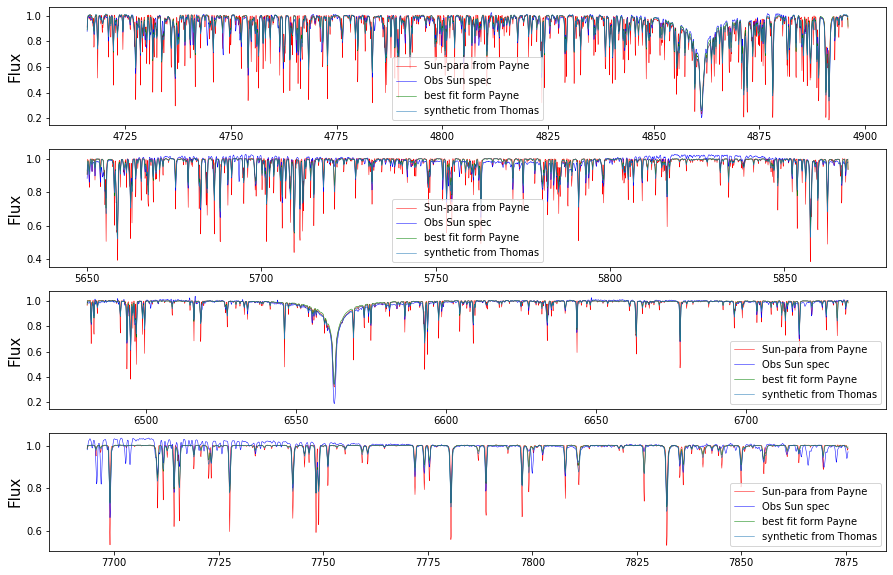

In [18]:
ccd = dict()
for each_ccd in range(4):
    ccd[each_ccd] = (wavelength > 1000*(4+each_ccd)) & (wavelength < 1000*(5+each_ccd))

f, gs = plt.subplots(4,1,figsize=(15,10))
for it in range(4):
    ax=gs[it]
    ax.plot(wavelength[ccd[it]], real_spec_3[ccd[it]], 'r', lw=0.5)    
    ax.plot(wavelength[ccd[it]], flux[0,:][ccd[it]], 'b', lw=0.5)
    ax.plot(wavelength[ccd[it]], fit_spec[0][ccd[it]], 'g', lw=0.5)
    ax.plot(wavelength[ccd[it]], interpolated_sun_spectra[ccd[it]], '', lw=0.5)
    
#     ax.plot(wavelength[ccd[it]], real_spec_3[ccd[it]]-interpolated_sun_spectra[ccd[it]], 'r', lw=0.5)    
#     ax.plot(wavelength[ccd[it]], flux[0,:][ccd[it]]-interpolated_sun_spectra[ccd[it]], 'b', lw=0.5)
#     ax.plot(wavelength[ccd[it]], fit_spec[0][ccd[it]]-interpolated_sun_spectra[ccd[it]], 'g', lw=0.5)

    ax.legend(labels=['Sun-para from Payne','Obs Sun spec','best fit form Payne','synthetic from Thomas'],loc='best')
    ax.set_ylabel('Flux',fontsize=15)
fig = plt.gcf()
fig.savefig('Sun_spectra.eps', format='eps')

In [ ]:
########################针对大角星

In [19]:
real_labels_1 = [4286, 1.64, -0.53,0.22,0.0]  
real_labels_2 = [4286, 2.64, -0.53,0.22,0.0]  
real_labels_3 = [4286, 3.64, -0.53,0.22,0.0]  
real_labels_4 = [4286, 4.64, -0.53,0.22,0.0] 

In [20]:
scaled_labels_1 = (real_labels_1[:]-x_min)/(x_max-x_min) - 0.5
scaled_labels_2 = (real_labels_2[:]-x_min)/(x_max-x_min) - 0.5
scaled_labels_3 = (real_labels_3[:]-x_min)/(x_max-x_min) - 0.5
scaled_labels_4 = (real_labels_4[:]-x_min)/(x_max-x_min) - 0.5

In [21]:
real_spec_1 = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels_1, NN_coeffs = NN_coeffs)
real_spec_2 = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels_2, NN_coeffs = NN_coeffs)
real_spec_3 = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels_3, NN_coeffs = NN_coeffs)
real_spec_4 = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels_4, NN_coeffs = NN_coeffs)

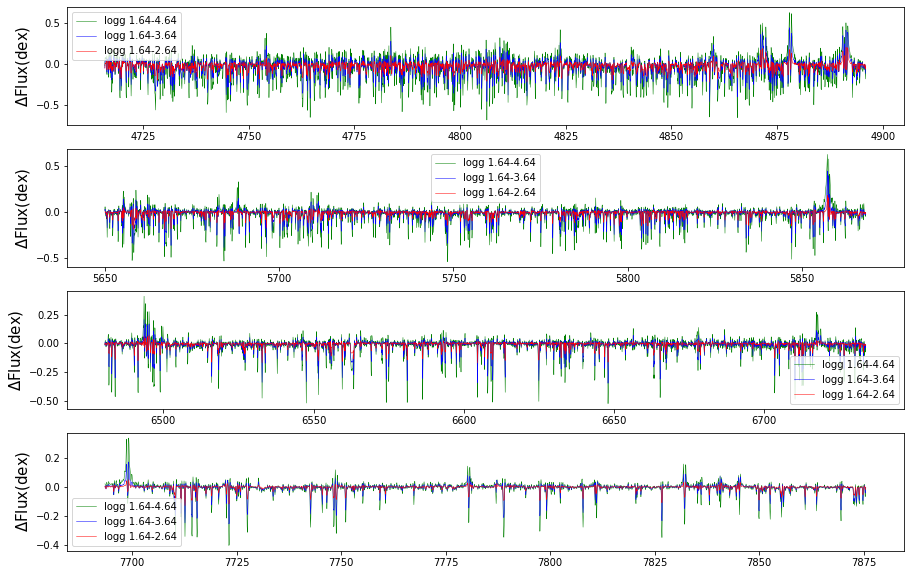

In [22]:
ccd = dict()
for each_ccd in range(4):
    ccd[each_ccd] = (wavelength > 1000*(4+each_ccd)) & (wavelength < 1000*(5+each_ccd))

f, gs = plt.subplots(4,1,figsize=(15,10))
for it in range(4):
    ax=gs[it]
    ax.plot(wavelength[ccd[it]], real_spec_1[ccd[it]]-real_spec_4[ccd[it]], 'g', lw=0.5)
    ax.plot(wavelength[ccd[it]], real_spec_1[ccd[it]]-real_spec_3[ccd[it]], 'b', lw=0.5)
    ax.plot(wavelength[ccd[it]], real_spec_1[ccd[it]]-real_spec_2[ccd[it]], 'r', lw=0.5)
    ax.legend(labels=['logg 1.64-4.64','logg 1.64-3.64','logg 1.64-2.64'],loc='best')
    ax.set_ylabel('$\Delta$Flux(dex)',fontsize=15)
fig = plt.gcf()
fig.savefig('logg_min3_arc.png', format='png')

In [23]:
real_labels_arc = [4286, 1.64, -0.53, 0.22, 0.0]

In [24]:
scaled_labels_arc = (real_labels_arc[:]-x_min)/(x_max-x_min) - 0.5

In [25]:
real_spec_arc = spectral_model.get_spectrum_from_neural_net(scaled_labels = scaled_labels_arc, NN_coeffs = NN_coeffs)

In [27]:
interpolated_arc_spectra = np.array([scipy.interp(wavelength, synthetic_SunArc['wavelength'], smod_norm_guess[0])]).reshape(14304)

In [28]:
interpolated_arc_spectra.shape

(14304,)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


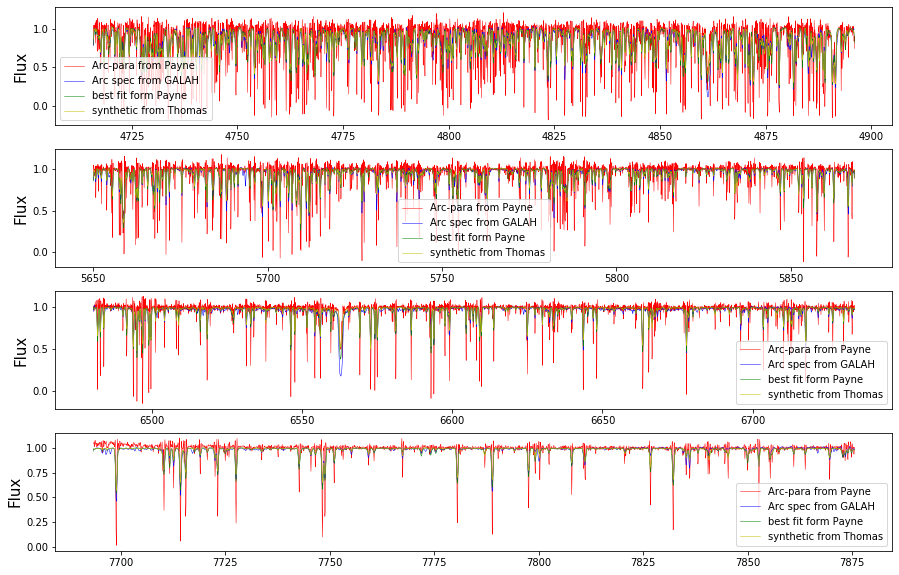

In [31]:
ccd = dict()
for each_ccd in range(4):
    ccd[each_ccd] = (wavelength > 1000*(4+each_ccd)) & (wavelength < 1000*(5+each_ccd))

f, gs = plt.subplots(4,1,figsize=(15,10))
for it in range(4):
    ax=gs[it]
    ax.plot(wavelength[ccd[it]], real_spec_arc[ccd[it]], 'r', lw=0.5)    
    ax.plot(wavelength[ccd[it]], flux[1,:][ccd[it]], 'b', lw=0.5)
    ax.plot(wavelength[ccd[it]], fit_spec[1][ccd[it]], 'g', lw=0.5)
    ax.plot(wavelength[ccd[it]], interpolated_arc_spectra[ccd[it]], 'y', lw=0.5)
    
#     ax.plot(wavelength[ccd[it]], real_spec_arc[ccd[it]]-interpolated_arc_spectra[ccd[it]], 'r', lw=0.5)    
#     ax.plot(wavelength[ccd[it]], flux[1,:][ccd[it]]-interpolated_arc_spectra[ccd[it]], 'b', lw=0.5)
#     ax.plot(wavelength[ccd[it]], fit_spec[1][ccd[it]]-interpolated_arc_spectra[ccd[it]], 'g', lw=0.5)

    ax.legend(labels=['Arc-para from Payne','Arc spec from GALAH','best fit form Payne','synthetic from Thomas'],loc='best')
    ax.set_ylabel('Flux',fontsize=15)
fig = plt.gcf()
fig.savefig('Arc_spectra.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


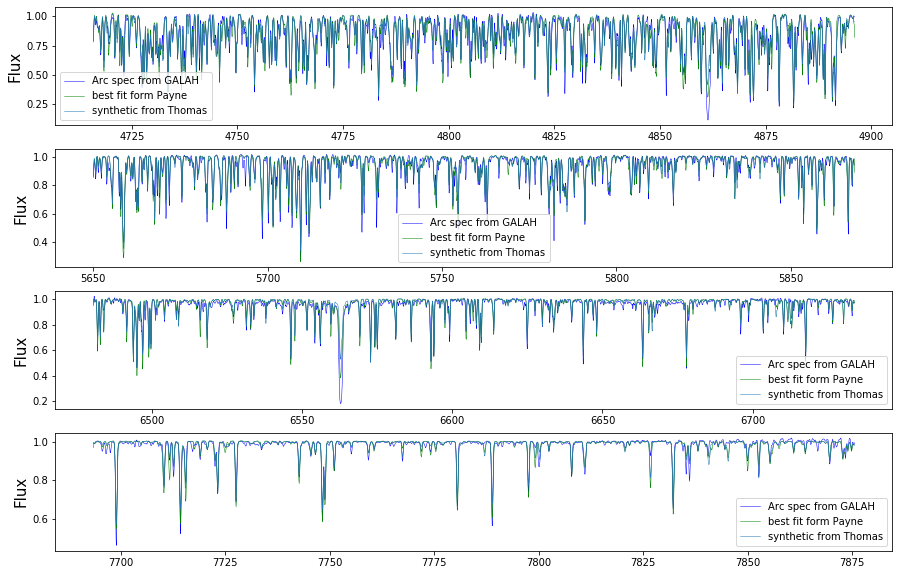

In [30]:
ccd = dict()
for each_ccd in range(4):
    ccd[each_ccd] = (wavelength > 1000*(4+each_ccd)) & (wavelength < 1000*(5+each_ccd))

f, gs = plt.subplots(4,1,figsize=(15,10))
for it in range(4):
    ax=gs[it]
#     ax.plot(wavelength[ccd[it]], real_spec_arc[ccd[it]], 'r', lw=0.5)    
    ax.plot(wavelength[ccd[it]], flux[1,:][ccd[it]], 'b', lw=0.5)
    ax.plot(wavelength[ccd[it]], fit_spec[1][ccd[it]], 'g', lw=0.5)
    ax.plot(wavelength[ccd[it]], interpolated_arc_spectra[ccd[it]], '', lw=0.5)
    
#     ax.plot(wavelength[ccd[it]], real_spec_arc[ccd[it]]-interpolated_arc_spectra[ccd[it]], 'r', lw=0.5)    
#     ax.plot(wavelength[ccd[it]], flux[1,:][ccd[it]]-interpolated_arc_spectra[ccd[it]], 'b', lw=0.5)
#     ax.plot(wavelength[ccd[it]], fit_spec[1][ccd[it]]-interpolated_arc_spectra[ccd[it]], 'g', lw=0.5)

    ax.legend(labels=['Arc spec from GALAH','best fit form Payne','synthetic from Thomas'],loc='best')
    ax.set_ylabel('Flux',fontsize=15)
fig = plt.gcf()
fig.savefig('Arc_spectra.eps', format='eps')